##### Name : Rashmi Nagpal
##### Course : Assignment 2, DataX2

#### Part A

#### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, Bidirectional

In [2]:
filename = 'INFY.NS.csv'
finance_dataset = pd.read_csv(filename)

In [3]:
finance_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
489,2018-12-24,657.000000,658.799988,647.599976,649.000000,625.419800,8379825
490,2018-12-26,647.000000,647.000000,637.349976,644.049988,620.649658,6178552
491,2018-12-27,652.750000,663.250000,649.000000,656.799988,632.936340,15333902
492,2018-12-28,663.349976,663.500000,653.299988,656.950012,633.080933,4736598
493,2018-12-31,660.000000,662.000000,655.799988,658.950012,635.008240,3373319


In [4]:
nRow,nCol = finance_dataset.shape
print("There are",nRow,"rows of dataset and",nCol,"columns of dataset.")

There are 494 rows of dataset and 7 columns of dataset.


##### Data Visualization

In [4]:
finance_dataset = finance_dataset.iloc[:493]

In [6]:
finance_dataset.shape

(493, 7)

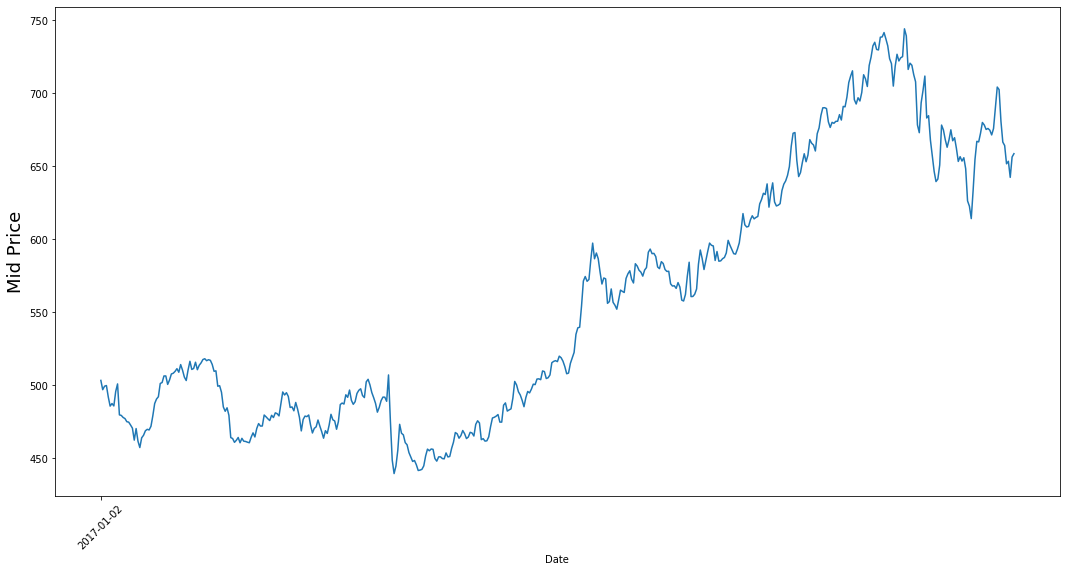

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(finance_dataset.shape[0]),(finance_dataset['Low']+finance_dataset['High'])/2.0)
plt.xticks(range(0,finance_dataset.shape[0],500),finance_dataset['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

##### This graph shows that the dataset is bursting with different behaviours of stock prices over time.

#### Split the dataset into testing and training set 

In [8]:
# Calculate the mid prices
high_prices = finance_dataset.loc[:,'High'].as_matrix()
low_prices = finance_dataset.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0
print("mid prices are ",mid_prices)

mid prices are  [503.074997 496.725006 499.112503 499.5625   491.724991 485.487503
 487.237503 485.600006 495.487503 500.675003 479.475006 479.100006
 477.699997 476.924988 474.787506 474.5      472.524994 470.399994
 462.175003 470.087494 461.462494 457.087509 463.774994 465.487503
 468.574997 469.587494 469.137497 471.637497 478.824997 487.237488
 490.337494 491.899994 500.987503 501.612503 506.125    506.137497
 500.350006 503.337494 507.487503 507.987503 509.274994 511.125
 508.675018 513.912491 510.125015 505.337509 503.       510.262512
 516.175003 510.600006 511.249985 515.537506 510.412506 513.437485
 515.087494 517.399994 517.924988 516.587494 517.262512 516.837494
 514.037506 509.325012 509.637482 499.100006 499.449997 494.975006
 484.899994 481.9375   484.3125   479.162506 463.899994 463.274994
 460.662506 462.0625   463.974991 460.375    463.387497 461.4375
 461.25     460.75     460.375    464.1875   467.137512 464.337494
 470.137497 473.512497 471.787506 471.849991 479.36

/Users/rashminagpal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/rashminagpal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
mid_prices.shape

(493,)

In [10]:
train_size = int(len(finance_dataset) * 0.80400)
test_size = len(finance_dataset) - train_size

In [11]:
train_data = mid_prices[:400]
test_data = mid_prices[400:]

In [12]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

#### Using Moving Average to predict stock prices for next 10/20 days 

In [13]:
finance_dataset['MA_window_10'] = finance_dataset['Close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
finance_dataset['MA_window_20'] = finance_dataset['Close'].rolling(20).mean().shift()

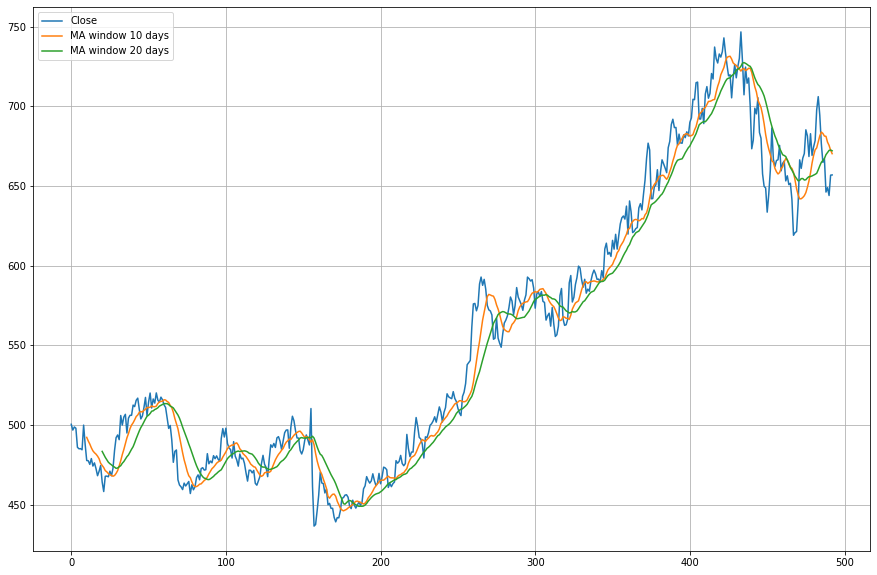

In [14]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(finance_dataset['Close'], label='Close')
plt.plot(finance_dataset['MA_window_10'], label='MA window 10 days')
plt.plot(finance_dataset['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

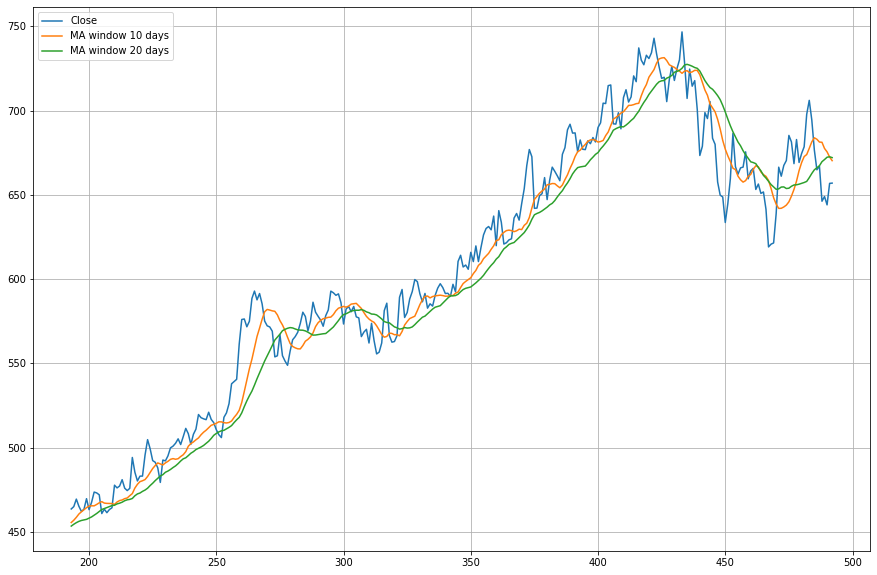

In [15]:
limit = 300

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(finance_dataset['Close'][-limit:], label='Close')
plt.plot(finance_dataset['MA_window_10'][-limit:], label='MA window 10 days')
plt.plot(finance_dataset['MA_window_20'][-limit:], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [14]:
look_back = 40
forward_days = 5
num_periods = 20

In [5]:
df = finance_dataset
df['Date'] = pd.to_datetime(finance_dataset['Date'])
df.set_index('Date',inplace=True)

In [6]:
df = df['Close']

In [7]:
df.shape

(493,)

In [8]:
df.head()

Date
2017-01-02    500.549988
2017-01-03    496.924988
2017-01-04    498.875000
2017-01-05    498.075012
2017-01-06    486.125000
Name: Close, dtype: float64

#### Data Visualization

/Users/rashminagpal/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


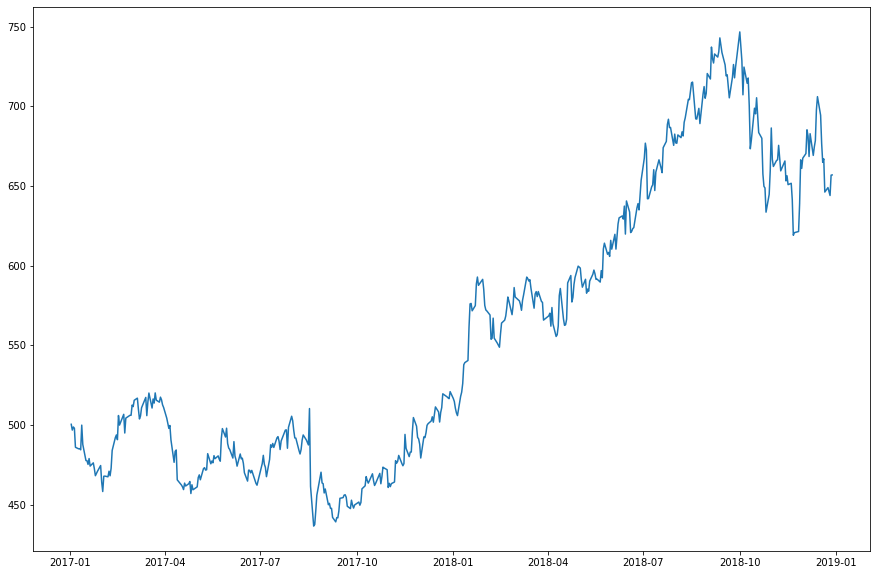

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df)
plt.show()

#### Data Normalization

In [9]:
dataset = df.values.reshape(df.shape[0],1)
dataset[:5]

array([[500.549988],
       [496.924988],
       [498.875   ],
       [498.075012],
       [486.125   ]])

In [25]:
dataset.shape

(493, 1)

In [10]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.20600088],
       [0.19430545],
       [0.20059682],
       [0.1980158 ],
       [0.15946116]])

#### Split the dataset into train and test set

In [96]:
num_periods = 20
division = len(dataset) - num_periods*forward_days

In [97]:
test_ = dataset[division-look_back:]
train_ = dataset[:division]

In [11]:
def preprocess_dataset(dataset, look_back, forward_days, lag = 1):
    X, Y = [],[]
    for i in range(0, len(dataset) - look_back - forward_days + 1, lag):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[(i+look_back):(i+look_back+forward_days)])
    return np.array(X), np.array(Y)

#### Split the dataset into train and validate set

In [15]:

X,y = preprocess_dataset(dataset,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
print("x_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_validate shape ",X_validate.shape)
print("y_validate shape ",y_validate.shape)

x_train shape  (359, 40, 1)
y_train shape  (359, 5)
X_validate shape  (90, 40, 1)
y_validate shape  (90, 5)


In [18]:
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(64,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(32,input_shape=(64,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=12,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 359 samples, validate on 90 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/12
359/359 - 14s - loss: 0.0160 - val_loss: 0.0079
Epoch 2/12
359/359 - 12s - loss: 0.0047 - val_loss: 0.0078
Epoch 3/12
359/359 - 12s - loss: 0.0046 - val_loss: 0.0041
Epoch 4/12
359/359 - 12s - loss: 0.0040 - val_loss: 0.0058
Epoch 5/12
359/359 - 12s - loss: 0.0038 - val_loss: 0.0046
Epoch 6/12
359/359 - 12s - loss: 0.0035 - val_loss: 0.0041
Epoch 7/12
359/359 - 13s - loss: 0.0032 - val_loss: 0.0042
Epoch 8/12
359/359 - 12s - loss: 0.0033 - val_loss: 0.0047
Epoch 9/12
359/359 - 13s - loss: 0.0029 - val_loss: 0.0034
Epoch 10/12
359/359 - 13s - loss: 0.0030 - val_loss: 0.0040
Epoch 11/12
359/359 - 13s - loss: 0.0032 - val_loss: 0.0041
Epoch 12/12
359/359 - 12s - loss: 0.0032 - val_loss: 0.0029


#### Visualize the model on training and test dataset

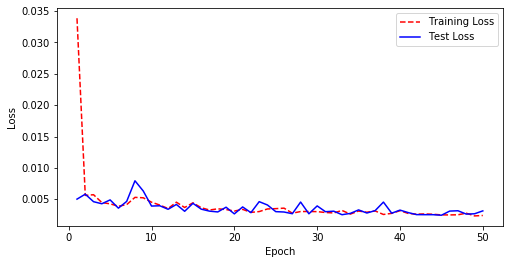

In [21]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Save the model

In [44]:
model.save("stock_prices_prediction.h5")

In [19]:
jan_filename = 'Jan_data.csv' 

#### Predict the model on test dataset

In [18]:
Xt = model.predict(X)
Xt = Xt.ravel()

#### Visualize the model on test dataset

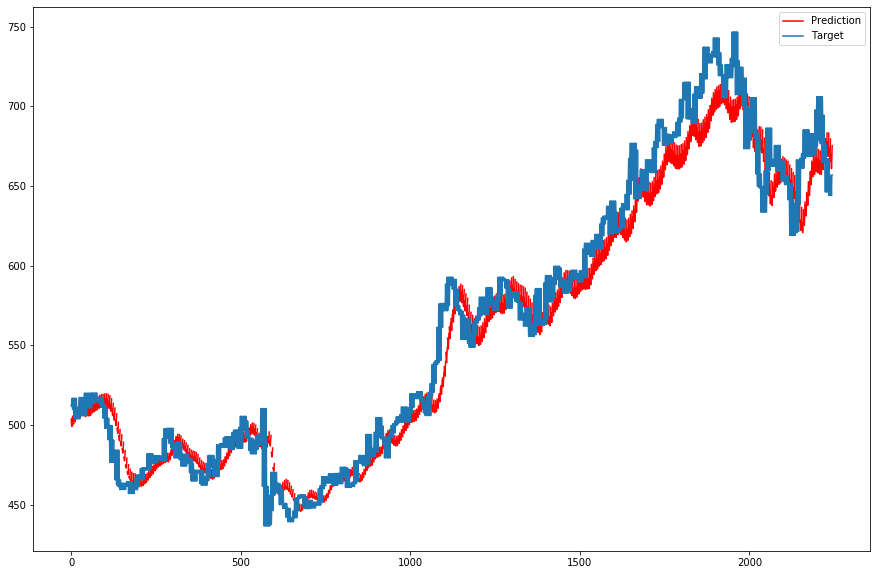

In [48]:
#To visualise training predictions

x = model.predict(X)
x = x.ravel()

plt.figure(figsize = (15,10))

plt.plot([x for x in range(look_back, look_back+len(x))], scaler.inverse_transform(x.reshape(-1,1)), color='r', label='Train')

plt.plot([x for x in range(look_back, look_back+len(x))], scaler.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

plt.legend()
plt.show()

In [20]:
jan = pd.read_csv(jan_filename)

In [21]:
jan.Date = pd.to_datetime(jan['Date'])
jan.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17,2019-01-24,728.099976,736.099976,721.000000,732.000000,705.404114,7429783
18,2019-01-25,728.000000,737.900024,724.250000,730.349976,703.814026,5543112
19,2019-01-28,731.000000,732.599976,719.000000,727.950012,701.501282,7944693
20,2019-01-29,725.500000,732.849976,716.500000,727.900024,701.453064,6760819
21,2019-01-30,727.900024,734.799988,721.099976,725.900024,699.525757,5763026


In [22]:
jan.set_index('Date', inplace=True)

In [23]:
jan = jan['Close']
jan.head()

Date
2019-01-01    665.049988
2019-01-02    669.049988
2019-01-03    669.150024
2019-01-04    661.049988
2019-01-07    671.700012
Name: Close, dtype: float64

In [24]:
jan = jan.values.reshape(jan.shape[0],1)
jan.shape

(22, 1)

In [25]:
jan = scaler.fit_transform(jan)
jan[:5]

array([[0.04744959],
       [0.09489918],
       [0.09608585],
       [0.        ],
       [0.12633482]])

#### Part B

#### Testing the model to predict Januray 2019 closing price, based on past 40 days every next 5 days will be predicted and that prediction output is used to estimate next 5 days.

In [31]:
xtest = dataset[-40:]

x_pred = []
for i in range(5):
    x = xtest[-40:]
    x_test = model.predict(x.reshape(1,40,1))
    x_pred.append(x_test)
    np.append(xtest,x_test.T)

In [32]:
#contains prediction for first 25 days of the year excluding saturday and sunday when the market is closed
x_pred = np.array(x_pred) 

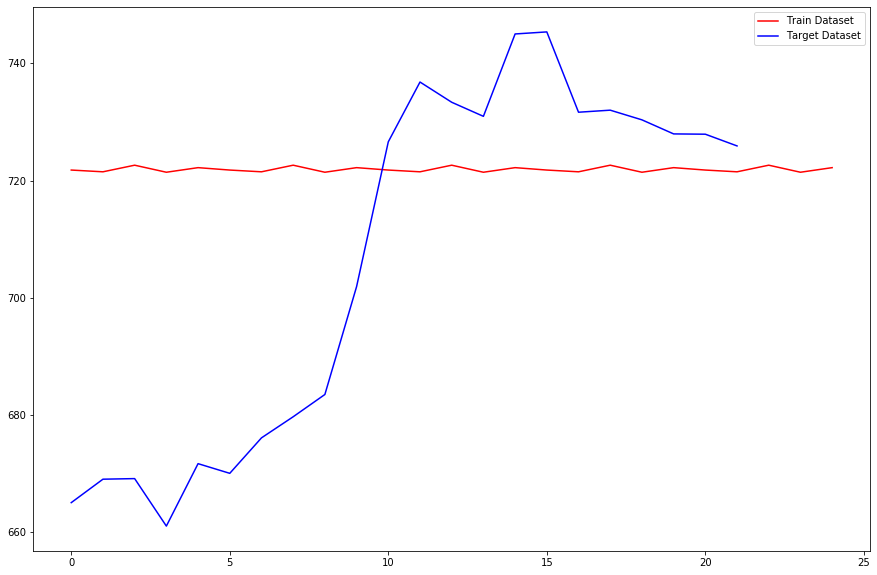

In [38]:
plt.figure(figsize = (15,10))

plt.plot([x for x in range(len(jan)+3)], scaler.inverse_transform(x_pred.reshape(-1,1)), color='r', label='Train Dataset')

plt.plot([x for x in range(len(jan))], scaler.inverse_transform(jan.reshape(-1,1)), color='b', label='Target Dataset')

plt.legend()
plt.show()

#### This reflects that the historical stock prices as well as the other factors contribute to make a profitable prediction. So, to enhance the prediction of my model, I used my own predicted days to update prediction w/ actual values.

#### Part C

In [40]:
xtest = dataset[-40:]
jan = np.append(xtest,jan)

X_jan,y_jan = preprocess_dataset(jan,look_back,forward_days)
y_jan = np.array([list(a.ravel()) for a in y_jan])

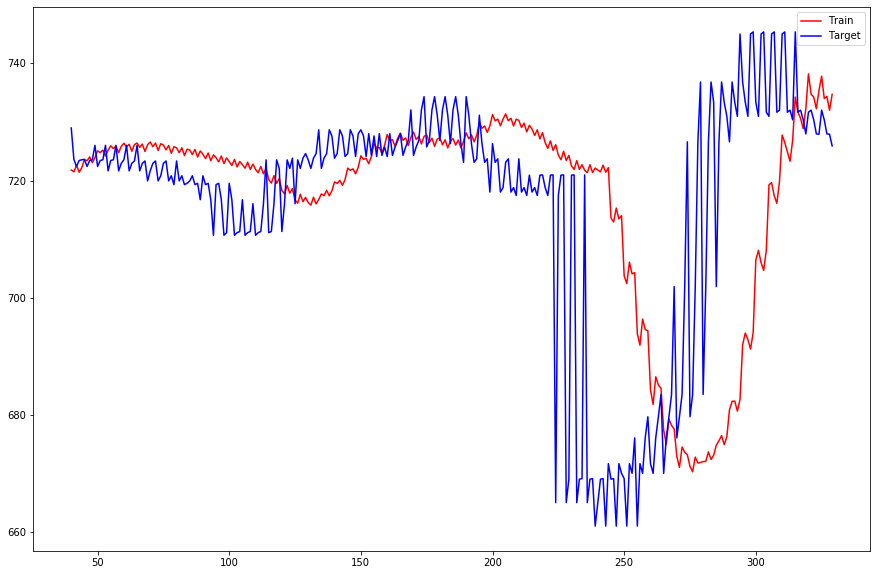

In [42]:
x_jan = model.predict(X_jan.reshape(X_jan.shape[0],X_jan.shape[1],1))
x_jan = x_jan.ravel()

plt.figure(figsize = (15,10))

plt.plot([x for x in range(look_back, look_back+len(x_jan))], scaler.inverse_transform(x_jan.reshape(-1,1)), color='r', label='Train')

plt.plot([x for x in range(look_back, look_back+len(x_jan))], scaler.inverse_transform(y_jan.reshape(-1,1)), color='b', label='Target')

plt.legend()
plt.show()